<h1><center>  DATA SCIENCE PROJECT </center></h1>
<center> Kristjan Pekk, Pärt Alango, Yaiza Rubio Chavida </center>
<center> University of Tartu </center>

<h1><center>  HIV ANALYSIS </center></h1>
<center>Study of HIV epidemiology indicators and treatments for children and adolescents.</center>


The two datasets used in this project were taken from: https://data.unicef.org/resources/dataset/hiv-aids-statistical-tables/.
To get better results for our project, we removed some data from the original datasets to have only the data needed to achieve our goals.

<center> </center>

First of all, we analyzed a dataset with HIV indicators from children and adolescents, depending on the continent, sex, age(0-19) and the year (1990-2019). 

To do this analysis we transformed the original dataset to a csv file. Then, we reduce it to study years from 2010 to 2019 and ages from 0-14, because we have no data about previous years and ages in the second dataset, so we couldn´t compare them. We also saw that some columns were not very useful for our analysis, so we eliminated them as well as incomplete rows. 

We cleaned most of the data changing different parameters in the following code and we exported it as a new csv file. 


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
pd.options.mode.chained_assignment = None  # default='warn' | for disposing of unneccesary errors
#indicators=pd.read_csv("Epidemiology.csv", sep=";", encoding='latin-1')
#indicators.drop(indicators.loc[indicators['Year']==1990].index, inplace=True)
#indicators.drop(indicators.loc[indicators['Age']!='Age 0-14'].index, inplace=True)
#indicators.drop("UNICEF Region", axis=1, inplace=True)
#indicators.to_csv("Tests.csv", index=False, encoding='utf8')

To have the data more separated, we divided this new csv file into two:
- AnnualDeaths.csv  (Estimated number of annual AIDS-related deaths of children 0-14 depending on country, sex and year (2010-2019))
- AnnualNewInfections.csv   (Estimated number of annual new HIV infections of children 0-14 depending on country, sex and year(2010-2019))

In [36]:
deaths=pd.read_csv("AnnualDeaths.csv", sep=",", encoding='latin-1')
print(deaths.shape)
deaths.head()

(2970, 6)


,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,220,150,360
1,Global,2010,Female,110,73,180
2,Global,2010,Male,110,75,180
3,Global,2011,Both,200,130,330
4,Global,2011,Female,97,65,160


In [42]:
#Deaths: rows 1-31: certain values
#        rows ... : 


#converting data "VALUE" to numeric, where applicable
i = 0
for val in deaths["Value"]:
    try:
        if int(val) < 100:
            val = int(val)*10
        deaths["Value"][i] = int(val)
    except ValueError:
        #todo: compute mean by upper&lower, use for replacing values with "<"
        if val.startswith("<"):
            deaths["Value"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            deaths["Value"][i] = int(float(val.replace(",","."))*100)
            print(deaths["Value"][i])
    i+=1
#todo: same for upper and lower
i=0
for val in deaths["Upper"]:
    try:
        if int(val) < 100:
            val = int(val)*10
        deaths["Upper"][i] = int(val)
    except ValueError:
        if val.startswith("<"):
            deaths["Upper"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            deaths["Upper"][i] = int(float(val.replace(",","."))*100)
            print(deaths["Upper"][i])
    i+=1
i=0
for val in deaths["Lower"]:
    try:
        if int(val) < 100:
            val = int(val)*10
        deaths["Lower"][i] = int(val)
    except ValueError:
        #todo: compute mean by upper&lower, use for replacing values with "<"
        if val.startswith("<"):
            deaths["Lower"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            deaths["Lower"][i] = int(float(val.replace(",","."))*100)
            print(deaths["Lower"][i])
    i+=1
#todo optimize

#for v in range(len(deaths)):
#    while deaths["Value"][v] < deaths["Lower"][v] or deaths["Value"][v]*10 < deaths["Upper"][v]: #if value is too low
#        deaths["Value"][v] *= 10 #multiply by 10 while needed
#        
#    while deaths["Upper"][v] < deaths["Lower"][v] or deaths["Upper"][v] < deaths["Value"][v]: #if upper is too low
#        deaths["Upper"][v] *= 10 #multiply by 10 while needed
#        
#    while deaths["Lower"][v]*10 < deaths["Upper"][v] or deaths["Lower"][v]*10 < deaths["Value"][v]: #if lower is too low
#        deaths["Upper"][v] *= 10 #multiply by 10 while needed
    

In [43]:
vals = deaths["Value"][:30]
genders = deaths["Sex"][:30]

total_M, count_M = 0,0
total_F, count_F = 0,0
total_B, count_B = 0,0

i = 0
for v in vals:
    if genders[i] == "Male":
        total_M += int(v)
        count_M += 1
    elif genders[i] == "Female":
        total_F += int(v)
        count_F += 1
    else:
        total_B += int(v)
        count_B += 1
    i+=1
    
print("averages, rows 1-30")
print("Male  Female  Both")       
print(str(total_M/count_M) + " | " + str(total_F/count_F) + " | " + str((total_B/count_B) / 2))
    


averages, rows 1-30
Male  Female  Both
538.0 | 612.0 | 115.5


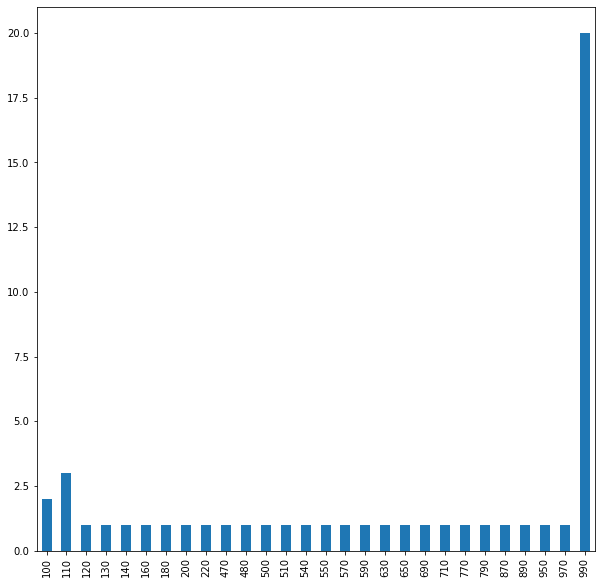

In [44]:
from numpy import histogram as hist
#hist(vals)
#hist = deaths[:30]["Value"].hist(bins = 50)
deaths["Value"][:50].value_counts().sort_index().plot(kind="bar")

In [45]:
for i in range(len(deaths["Upper"])):
    print(str(deaths["Upper"][i]) + " | "+str(deaths["Lower"][i]) +" | "+ str(deaths["Value"][i]))

360 | 150 | 220
180 | 730 | 110
180 | 750 | 110
330 | 130 | 200
160 | 650 | 970
170 | 670 | 100
290 | 120 | 180
140 | 580 | 870
150 | 600 | 890
260 | 100 | 160
130 | 510 | 770
130 | 530 | 790
230 | 940 | 140
110 | 460 | 690
120 | 480 | 710
210 | 850 | 130
100 | 420 | 630
110 | 430 | 650
190 | 760 | 120
920 | 370 | 570
950 | 390 | 590
180 | 710 | 110
860 | 350 | 540
890 | 360 | 550
160 | 660 | 100
800 | 320 | 500
820 | 330 | 510
150 | 610 | 950
750 | 300 | 470
770 | 310 | 480
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
199 | 990 | 990
499 | 990 | 990
199 | 990 | 990
199 | 990 | 990
480 | 310 | 370
240 | 150 | 190
240 | 15

990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
140 | 800 | 110
680 | 499 | 540
710 | 499 | 570
130 | 710 | 100
640 | 499 | 500
670 | 499 | 530
110 | 560 | 830
540 | 499 | 499
560 | 499 | 499
970 | 499 | 710
499 | 499 | 499
499 | 499 | 499
910 | 499 | 660
499 | 499 | 499
499 | 499 | 499
890 | 499 | 620
499 | 199 | 499
499 | 499 | 499
890 | 499 | 630
499 | 199 | 499
499 | 199 | 499
860 | 499 | 610
499 | 199 | 499
499 | 199 | 499
770 | 499 | 510
499 | 199 | 499
499 | 199 | 499
760 | 499 | 499
499 | 199 | 499
499 | 199 | 499
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 199
990 | 990 | 990
990 | 99

990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 199 | 199
990 | 990 | 990
990 | 990 | 990
199 | 199 | 199
990 | 990 | 990
990 | 990 | 990
199 | 990 | 199
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
199 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
990 | 990 | 990
499 | 499 | 499
499 | 199 | 199
499 | 199 | 499
520 | 499 | 499
499 | 199 | 499
499 | 199 | 499
590 | 49

100 | 600 | 810
100 | 610 | 830
140 | 819 | 110
700 | 409 | 560
720 | 409 | 570
110 | 660 | 910
560 | 330 | 450
570 | 330 | 459
940 | 550 | 760
459 | 270 | 380
470 | 280 | 390
780 | 459 | 640
390 | 229 | 320
390 | 229 | 320
670 | 390 | 550
330 | 190 | 270
340 | 200 | 280
650 | 360 | 500
320 | 180 | 250
330 | 180 | 250
630 | 330 | 450
310 | 160 | 220
320 | 160 | 229
610 | 300 | 409
300 | 150 | 200
310 | 150 | 210
830 | 450 | 640
409 | 220 | 320
420 | 229 | 320
800 | 430 | 620
400 | 210 | 310
400 | 220 | 310
780 | 420 | 600
390 | 210 | 300
390 | 210 | 300
710 | 390 | 550
360 | 190 | 280
360 | 190 | 280
620 | 340 | 480
310 | 170 | 240
310 | 170 | 240
620 | 330 | 480
310 | 170 | 240
310 | 170 | 240
560 | 300 | 430
280 | 150 | 220
280 | 150 | 220
480 | 260 | 370
240 | 130 | 180
240 | 130 | 190
490 | 270 | 380
240 | 130 | 190
250 | 130 | 190
470 | 250 | 360
229 | 130 | 180
240 | 130 | 180
190 | 760 | 120
960 | 380 | 610
969 | 380 | 620
160 | 640 | 100
810 | 320 | 509
819 | 320 | 520
120 | 48

deaths - still need better representation


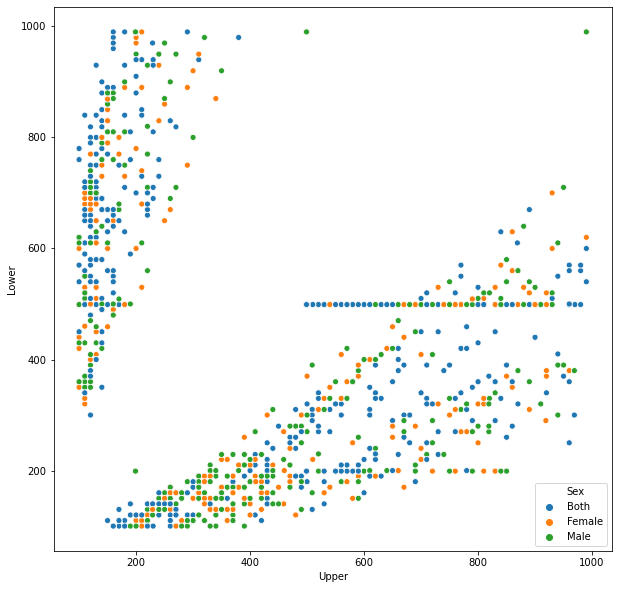

done


In [46]:
#todo - drop or modify weird rows

#----------------------
print("deaths - still need better representation")
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=deaths, hue='Sex')
plt.show()
print("done")

In [7]:
infections=pd.read_csv("AnnualNewInfections.csv", sep=",", encoding='latin-1')
print(infections.shape)
infections.head()

(2940, 6)


,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,310,200,500
1,Global,2010,Female,150,97,240
2,Global,2010,Male,160,100,250
3,Global,2011,Both,270,170,430
4,Global,2011,Female,130,85,210


Our UNICEF second dataset contained the percentage and the numbers of children(0-14 years) with HIV recieving ART treatment. In this dataset we had different indicators, some of them were the number of children, and the other ones were represented
by percentage. So we realized we couldn´t mix the values to get good results. To solve this problem we joined data as shown below. In this way, we simplify a lot the original data due to most of the information was twice. 

In [8]:
treatments=pd.read_csv("Treatment.csv", sep=";", encoding='latin-1')
print(treatments.shape)
treatments.head()

(930, 7)


,Country,Region,Year,Percentage,Lower,Upper,Number
0,Afghanistan,South Asia,2010,<1,<1,1.8,0
1,Afghanistan,South Asia,2011,1.8,<1,4.3,10
2,Afghanistan,South Asia,2012,2.0,<1,4.7,10
3,Afghanistan,South Asia,2013,3.4,1.7,8.1,10
4,Afghanistan,South Asia,2014,4.6,2.2,11.1,20


Finally, we separated one dataset to get one with analysis divided in 7 regions. These regions are: Eastern and Southern Africa, Sub-Saharan Africa, East and North Africa, Latin America and Caribbean, Middle  South Asia, East Asia and Pacific, West and Central Africa with values of years from 2010-2019.

(80, 6)


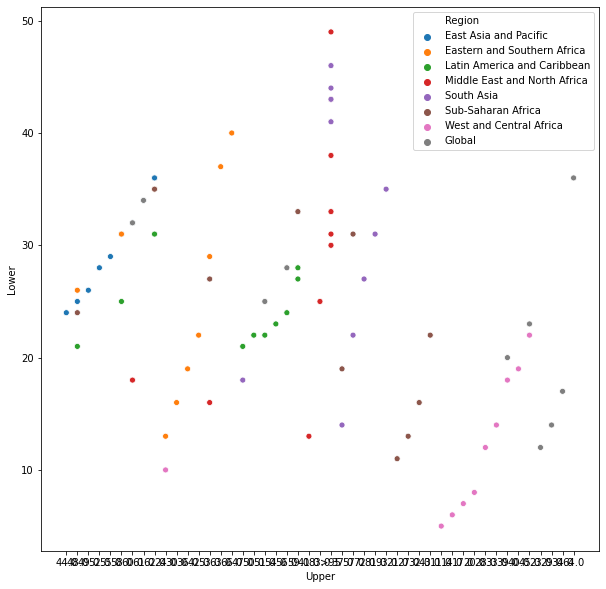

In [9]:
regions=pd.read_csv("Global.csv", sep=";", encoding='latin-1', header=None, names= ["Region","Year","Percentage","Lower","Upper", "Number"])
print(regions.shape)
regions.head()
#still need to work on that graph
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=regions, hue='Region')
plt.show()

<center> Thank you </center>